In [1]:
import warnings
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
file = '~/Downloads/ClimSim_low-res_grid-info.nc'
grid = xr.open_dataset(file,engine='netcdf4')
x = grid.lon
y = grid.lat

In [3]:
def load(model,metricval):
    file = '~/Downloads/metrics_netcdf/'+model+'_'+metricval+'.nc'
    data = xr.open_dataset(file,engine='netcdf4')
    return data

In [4]:
models  = ['CNN','ED','HSR','MLP','RPN','cVAE']
metrics = ['MAE','R2','RMSE']
vardict = {'$dT/dt$':'ptend_t',
           '$dq/dt$':'ptend_q0001',
           'NETSW':'cam_out_NETSW',
           'FLWDS':'cam_out_FLWDS',
           'PRECSC':'cam_out_PRECSC',
           'PRECC':'cam_out_PRECC',
           'SOLS':'cam_out_SOLS',
           'SOLL':'cam_out_SOLL',
           'SOLSD':'cam_out_SOLSD',
           'SOLLD':'cam_out_SOLLD'}

In [23]:
for var,varname in vardict.items():
    for metric in metrics:
        for model in models:
            data = load(model,metric)[varname]
            if 'lev' in data.dims:
                data = data.mean(dim='lev')
            if model == 'R2':
                data = data.where(x<0,0)
                print(f'{var} {metric} {model}... Min: {data.min().values}, Max: {data.max().values}')

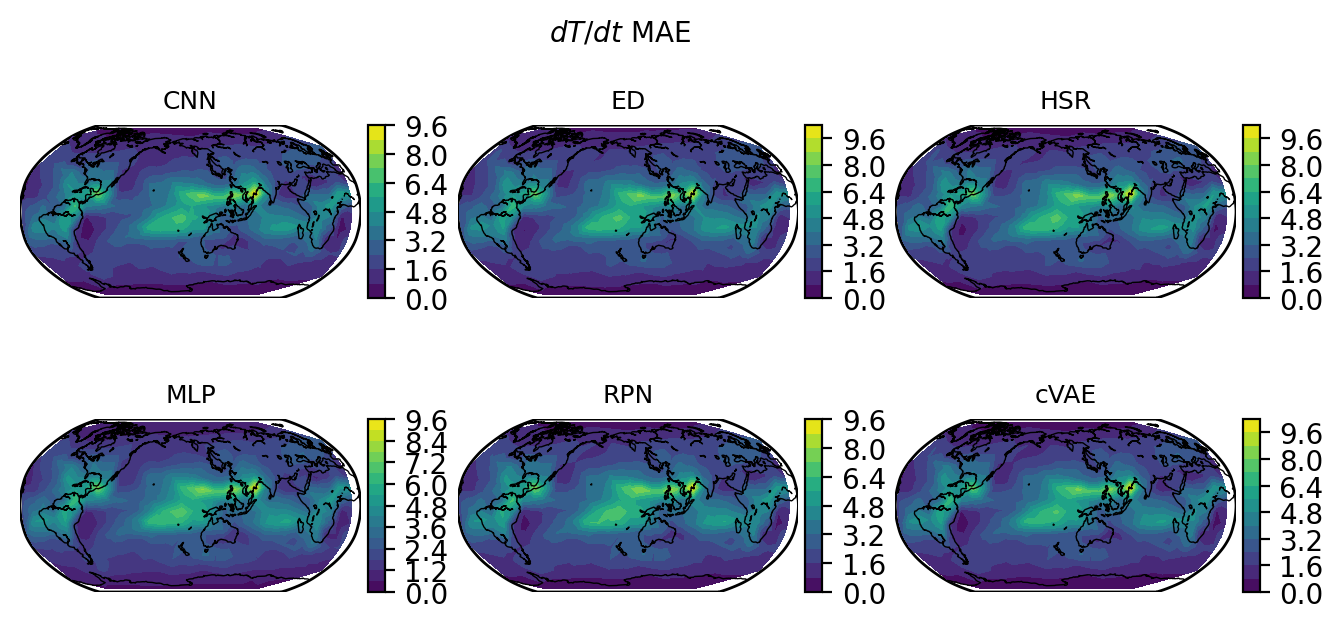

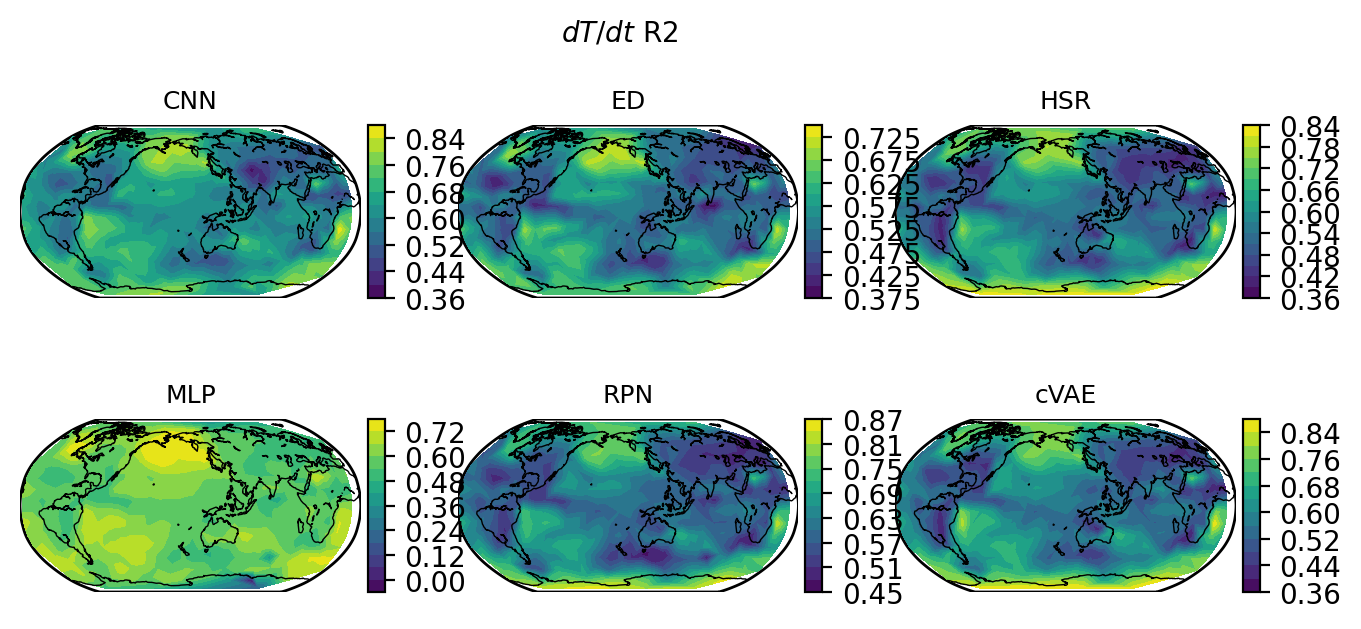

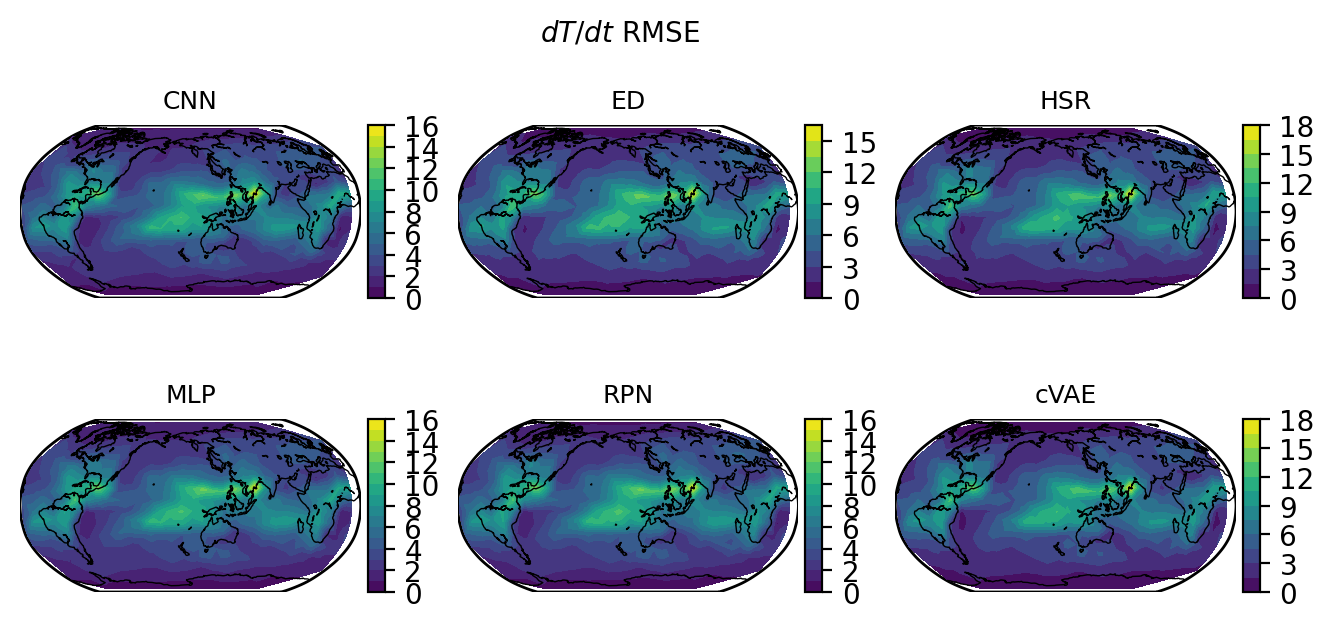

KeyboardInterrupt: 

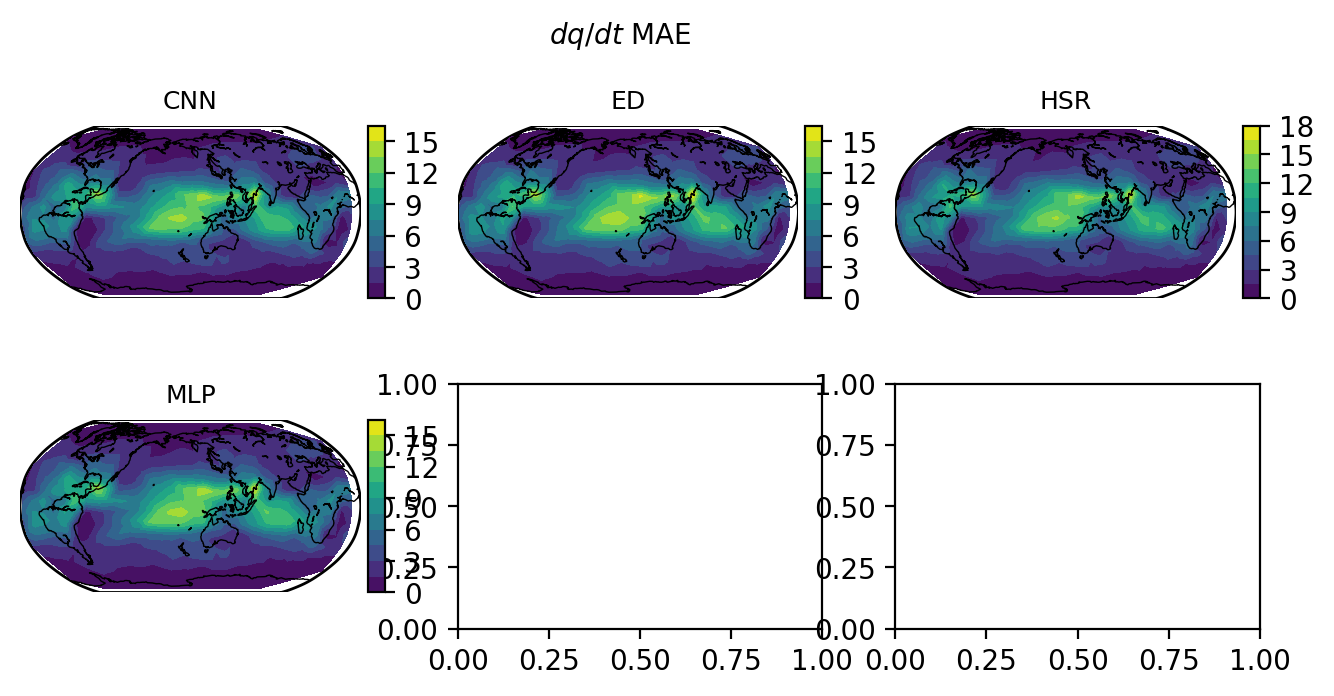

In [21]:
for var,varname in vardict.items():
    for metric in metrics:
        fig,axs = plt.subplots(ncols=3,nrows=2,figsize=(8,3.5))
        fig.suptitle(f'{var} {metric}',fontsize=10)
#         cax = fig.add_axes([0.95,0.1,0.02,0.7])
        
        for ax,model in zip(axs.flat,models):
            m = Basemap(projection='robin',lon_0=165,resolution='c',ax=ax)
            m.drawcoastlines(linewidth=0.5) 
            x,y = m(grid.lon,grid.lat)
            ax.set_title(model,fontsize=9)
            
            data = load(model,metric)[varname]
            if 'lev' in data.dims:
                data = data.mean(dim='lev')
            if model == 'R2':
                data = data.where(x<0,0)
            
            
            
            plot = ax.tricontourf(x,y,data,cmap='viridis',levels=14,vmin=0.,vmax=1.)
            
            cb = m.colorbar(plot,ax=ax)
            
#         cb = plt.colorbar(plot,cax=cax)
#         plt.tight_layout(rect=[0.05,0.025,0.95,0.975])
        plt.show()